Bùi Quang Hậu_19144255_Face_id_group


In [ ]:
import numpy as np #tinh toan
import pandas as pd #xu li bang
import seaborn as sns #do thi du lieu
import matplotlib.pyplot as plt # ve
from sklearn.preprocessing import StandardScaler # xu li xu lieu cho dong deu
from sklearn.model_selection import train_test_split # chia du lieu
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM # nhom chuan
from keras.models import Sequential #
from tensorflow.keras.utils import to_categorical #### chỉ cho 1 giá trị (1) hiện lên
from keras import callbacks #
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # đo lường
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import os
from keras.backend import conv2d

In [ ]:
url='/content/drive/MyDrive/Colab Notebooks/face_id_group'

In [ ]:
generator= ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_data=generator.flow_from_directory(url,target_size=(150,150),batch_size=10,class_mode='categorical',subset='training')
validation_dataset=generator.flow_from_directory(url,target_size=(150,150),batch_size=10,class_mode='categorical',subset='validation')

Found 162 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [ ]:
validation_dataset.class_indices

{'H.An': 0, 'Phat': 1, 'me': 2, 'not_me': 3}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) #size:32x32, 3 kenh mau
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
opt=Adam(learning_rate=0.002)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=10,batch_size=10,validation_data=validation_dataset,verbose=1)
score=model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là:',score[0])
print('Độ chính xác kiểm tra là:',score[1])

Epoch 1/10
17/17 [==============================] - 36s 2s/step - loss: 5.2572 - accuracy: 0.4630 - val_loss: 1.0762 - val_accuracy: 0.4444
Epoch 2/10
17/17 [==============================] - 32s 2s/step - loss: 0.4910 - accuracy: 0.8148 - val_loss: 0.3912 - val_accuracy: 0.8333
Epoch 3/10
17/17 [==============================] - 32s 2s/step - loss: 0.1811 - accuracy: 0.9506 - val_loss: 0.2284 - val_accuracy: 0.8333
Epoch 4/10
17/17 [==============================] - 32s 2s/step - loss: 0.4648 - accuracy: 0.8827 - val_loss: 0.6917 - val_accuracy: 0.7222
Epoch 5/10
17/17 [==============================] - 32s 2s/step - loss: 0.2317 - accuracy: 0.9198 - val_loss: 0.2732 - val_accuracy: 0.8889
Epoch 6/10
17/17 [==============================] - 33s 2s/step - loss: 0.0868 - accuracy: 0.9630 - val_loss: 0.0764 - val_accuracy: 0.9444
Epoch 7/10
17/17 [==============================] - 32s 2s/step - loss: 0.0574 - accuracy: 0.9815 - val_loss: 0.1952 - val_accuracy: 0.9444
Epoch 8/10
17/17 [==

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/face_id_group/final_id_group')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/face_id_group/final_id_group/assets


In [ ]:
model=load_model('/content/drive/MyDrive/Colab Notebooks/face_id_group/final_id_group')

Found 13 images belonging to 1 classes.


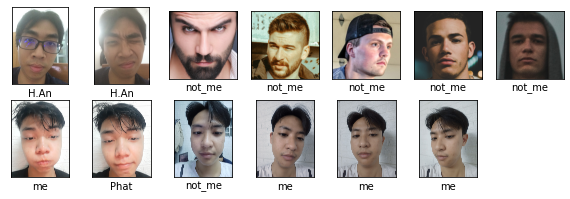

In [ ]:
generator= ImageDataGenerator(rescale=1./255)
generator_data=generator.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/face_id_test_group',batch_size=5,
                                          shuffle=False,interpolation='lanczos')
face={0:'H.An',
      1:'Phat',
      2:'me',
      3:'not_me'}
plt.figure(figsize=(10,10))
for i in range(len(generator_data.filenames)):
    plt.subplot(6,7,i+1)
    plt.imshow(io.imread(os.path.join(generator_data.directory,generator_data.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('/content/drive/MyDrive/Colab Notebooks/face_id_test_group/'+generator_data.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img=img/255
    plt.xlabel(face[np.argmax(model.predict(img))])
plt.show()